In [16]:
np.array(test_des).shape

(1692, 1024, 128)

In [0]:
des_vec=np.array(train_des)
des_vec=des_vec.reshape(-1,128)

In [22]:
des_vec.shape

(3133440, 128)

In [25]:
codebooksize=400
seeding = kmc2.kmc2(des_vec, codebooksize) 
Kmeans = MiniBatchKMeans(codebooksize, init=seeding,init_size=400).fit(des_vec)
codebook = Kmeans.cluster_centers_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Explicit initial center position passed: performing only one init in MiniBatchKMeans instead of n_init=3
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
codebook.shape

(400, 128)

In [0]:
def histogram(data_set,size):
  train_his=[]
  for i in data_set:
    den=dense_sift(i,8)
    predict=Kmeans.predict(den)
    count=np.bincount(predict,minlength=size)
    train_his.append(count)
  return train_his

#h_list=histogram(train_data,codebooksize)
#h_list=np.array(h_list)

In [0]:
def histogram_vq(data_des):

  his=[]
  for i in data_des:
    code_word=vq(i,codebook)[0]
    count=np.bincount(code_word,minlength=400)
    his.append(count)
  return his  

h_list=histogram_vq(train_des)
h_list=np.array(h_list)

(3060, 400)


<BarContainer object of 400 artists>

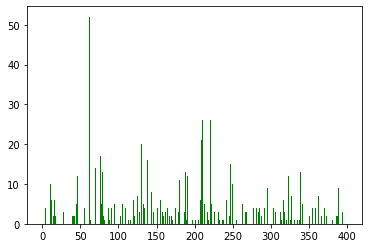

In [29]:
print(h_list.shape)
plt.bar(range(400),h_list[0,:] , color='g')

In [30]:
#test_h=histogram(test_data,codebooksize)
test_h=histogram_vq(test_des)
test_h=np.array(test_h)
test_h

array([[ 1, 37, 11, ...,  0,  0,  2],
       [11,  3,  0, ...,  0,  0,  0],
       [ 0, 20,  0, ...,  1,  0,  2],
       ...,
       [ 0,  0,  2, ...,  0,  0,  0],
       [ 0, 39,  9, ...,  0,  0,  0],
       [ 0,  9,  0, ...,  0,  3,  0]])

In [0]:
with open('histogram400_256_8.txt','wb') as f:
  pickle.dump(h_list,f)
with open('histogram_test400_256_8.txt','wb') as f:
  pickle.dump(test_h,f)
with open('label.txt','wb') as f:
  pickle.dump(label,f)
with open('test_name.txt','wb') as f:
  pickle.dump(test_name,f)

In [32]:
'''
with open('histogram.txt','rb') as f:
  h_list=pickle.load(f)
with open('histogram_test.txt','rb') as f:
  test_h=pickle.load(f)
with open('label.txt','rb') as f:
  label=pickle.load(f)
with open('test_name.txt','rb') as f:
  test_name=pickle.load(f)
'''

"\nwith open('histogram.txt','rb') as f:\n  h_list=pickle.load(f)\nwith open('histogram_test.txt','rb') as f:\n  test_h=pickle.load(f)\nwith open('label.txt','rb') as f:\n  label=pickle.load(f)\nwith open('test_name.txt','rb') as f:\n  test_name=pickle.load(f)\n"

In [0]:
X_train,X_val,y_train,y_val=train_test_split(h_list,label,test_size=0.1,random_state=42)

In [34]:
'''
X_train = xp.asarray(X_train)
X_val = xp.asarray(X_val)
y_train = xp.asarray(y_train)

#svm = SVM(kernel='linear', kernel_params={'sigma': 15}, classification_strategy='ovr', x=X_train, y=y_train, n_folds=3, use_optimal_lambda=True, display_plots=True)
svm = SVM(kernel='linear',classification_strategy='ovr', kernel_params={'C':1},x=X_train, y=y_train)

svm.fit(X_train, y_train)

X_val = xp.asarray(X_val)
val_fit=svm.predict(X_val)
print(type(xp.asnumpy(val_fit)))

test_h = xp.asarray(test_h)
result=svm.prdict(test_h)
result=xp.asnumpy(result)
'''


"\nX_train = xp.asarray(X_train)\nX_val = xp.asarray(X_val)\ny_train = xp.asarray(y_train)\n\n#svm = SVM(kernel='linear', kernel_params={'sigma': 15}, classification_strategy='ovr', x=X_train, y=y_train, n_folds=3, use_optimal_lambda=True, display_plots=True)\nsvm = SVM(kernel='linear',classification_strategy='ovr', kernel_params={'C':1},x=X_train, y=y_train)\n\nsvm.fit(X_train, y_train)\n\nX_val = xp.asarray(X_val)\nval_fit=svm.predict(X_val)\nprint(type(xp.asnumpy(val_fit)))\n\ntest_h = xp.asarray(test_h)\nresult=svm.prdict(test_h)\nresult=xp.asnumpy(result)\n"

In [35]:

from sklearn.model_selection import GridSearchCV

svm = SVC(kernel='linear')
param_grid = {'C':[1,2,3]}
grid = GridSearchCV(svm, param_grid, cv=5)

grid.fit(X_train,y_train)
#svm.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
val_fit=grid.predict(X_val)

result=grid.predict(test_h)
grid.best_params_


{'C': 1}

In [0]:
#val_fit=svm.predict(X_val)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(xp.asnumpy(val_fit),y_val))

print(confusion_matrix(xp.asnumpy(val_fit),y_val))

              precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2
           5       0.80      0.80      0.80         5
           6       0.80      1.00      0.89         4
           7       0.17      0.14      0.15         7
           8       0.00      0.00      0.00         5
           9       0.43      0.60      0.50         5
          10       0.20      0.25      0.22         4
          11       0.33      0.20      0.25         5
          12       0.50      0.29      0.36         7
          13       0.00      0.00      0.00         1
          14       1.00      0.50      0.67         4
          15       0.00      0.00      0.00         1
          16       0.50      0.67      0.57         3
          17       1.00      0.25      0.40         4
          18       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
result_=np.append(['Category'],result)
result_id=np.append(['Id'],test_name)


In [40]:
#df = pd.DataFrame(result_,columns=['id','Category'])
df = pd.DataFrame(result_,result_id,columns=[' '])
df.to_csv('results_.csv',index=True, header=False)
df

,
Id,Category
image_0001.jpg,38
image_0002.jpg,89
image_0003.jpg,92
image_0004.jpg,51
...,...
image_1688.jpg,27
image_1689.jpg,61
image_1690.jpg,29
image_1691.jpg,45


In [0]:
#! kaggle competitions submit -c 2019-ml-finalproject -f results_.csv -m "sanhee-1203"